In [3]:
import cts
from tqdm.contrib.concurrent import process_map
import pandas as pd
from functools import partial
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def bootstrap(df, column, pos_weight, total_rows, replace=True):
    num_true_rows = len(df[df[column] == 1])
    num_false_rows = len(df[df[column] != 1])
    true_weight = pos_weight / num_true_rows
    false_weight = (1 - pos_weight) / num_false_rows
    weights = df[column].map(lambda x: true_weight if x == 1 else false_weight)
    return df.sample(n=total_rows, replace=replace, weights=weights)

In [12]:
R = 0.05

bootstrap_sample_size = 80000

df_main = pd.read_csv('full_random_men.csv')

sample = bootstrap(df_main, 'click', 0.06, 80000)
partial_func = partial(cts.ctr_simulator, K_arms = 34, d = 66, R = R)
    
results_1 = partial_func(sample)

80000it [1:22:36, 16.14it/s]


In [13]:
R = 0.01

bootstrap_sample_size = 80000

df_main = pd.read_csv('full_random_men.csv')

sample = bootstrap(df_main, 'click', 0.06, 80000)
partial_func = partial(cts.ctr_simulator, K_arms = 34, d = 66, R = R)
    
results_2 = partial_func(sample)

80000it [1:18:36, 16.96it/s]


In [14]:
R = 0.05

bootstrap_sample_size = 80000

df_main = pd.read_csv('full_bts_men.csv')

sample = bootstrap(df_main, 'click', 0.06, 80000)
partial_func = partial(cts.ctr_simulator, K_arms = 34, d = 66, R = R)
    
results_3 = partial_func(sample)

80000it [1:16:35, 17.41it/s]


In [15]:
R = 0.01

bootstrap_sample_size = 80000

df_main = pd.read_csv('full_bts_men.csv')

sample = bootstrap(df_main, 'click', 0.06, 80000)
partial_func = partial(cts.ctr_simulator, K_arms = 34, d = 66, R = R)
    
results_4 = partial_func(sample)

80000it [1:16:44, 17.37it/s]


In [19]:
df_main = pd.read_csv('full_random_men.csv')
param_values = [0.005, 0.01, 0.05, 0.1]
gridsearch_results = []
for R, epsilon, delta in np.array(np.meshgrid(param_values, param_values, param_values)).T.reshape(-1, 3):
    sample = bootstrap(df_main, 'click', 0.06, 5000)
    partial_func = partial(cts.ctr_simulator, K_arms = 34, d = 66, R = R, epsilon = epsilon, delta = delta)
    
    gridsearch_results.append(partial_func(sample))

5000it [04:51, 17.14it/s]
5000it [04:47, 17.42it/s]
5000it [04:53, 17.01it/s]
5000it [04:54, 16.95it/s]
5000it [05:04, 16.41it/s]
5000it [04:53, 17.04it/s]
5000it [05:00, 16.64it/s]
5000it [05:07, 16.24it/s]
5000it [05:07, 16.25it/s]
5000it [05:05, 16.35it/s]
5000it [05:06, 16.31it/s]
5000it [04:31, 18.44it/s]
5000it [04:25, 18.85it/s]
5000it [04:25, 18.82it/s]
5000it [04:26, 18.75it/s]
5000it [04:24, 18.94it/s]
5000it [04:22, 19.03it/s]
5000it [04:27, 18.67it/s]
5000it [04:26, 18.79it/s]
5000it [04:27, 18.67it/s]
5000it [04:25, 18.81it/s]
5000it [04:26, 18.75it/s]
5000it [04:25, 18.80it/s]
5000it [04:28, 18.61it/s]
5000it [04:28, 18.59it/s]
5000it [04:23, 18.97it/s]
5000it [04:27, 18.71it/s]
5000it [04:25, 18.85it/s]
5000it [04:26, 18.79it/s]
5000it [04:22, 19.02it/s]
5000it [04:21, 19.09it/s]
5000it [04:25, 18.83it/s]
5000it [04:26, 18.74it/s]
5000it [04:23, 18.99it/s]
5000it [04:23, 18.95it/s]
5000it [04:23, 18.97it/s]
5000it [04:27, 18.70it/s]
5000it [04:26, 18.79it/s]
5000it [04:2

262


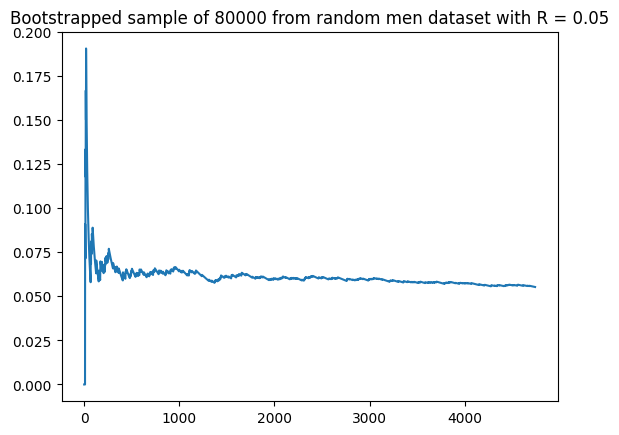

In [21]:
aligned_time_steps, cum_rewards, aligned_ctr, policy = results_1
R = 0.05
print(cum_rewards)
plt.plot(aligned_ctr)
plt.title("Bootstrapped sample of 80000 from random men dataset with R = "+str(R))
plt.show()

266


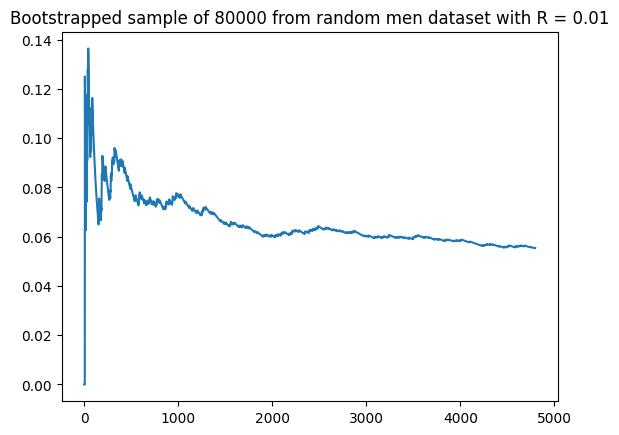

In [23]:
aligned_time_steps, cum_rewards, aligned_ctr, policy = results_2
R = 0.01
print(cum_rewards)
plt.plot(aligned_ctr)
plt.title("Bootstrapped sample of 80000 from random men dataset with R = "+str(R))
plt.show()

64


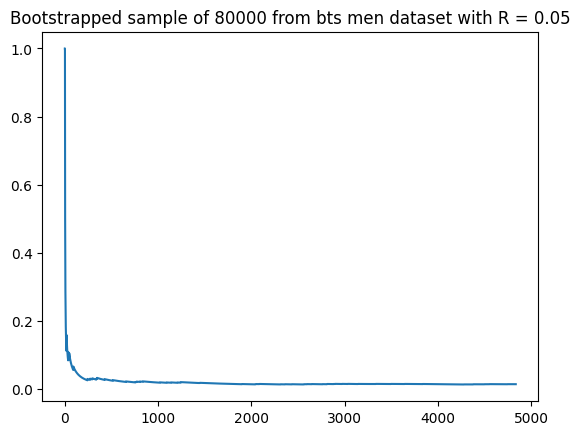

In [24]:
aligned_time_steps, cum_rewards, aligned_ctr, policy = results_3
R = 0.05
print(cum_rewards)
plt.plot(aligned_ctr)
plt.title("Bootstrapped sample of 80000 from bts men dataset with R = "+str(R))
plt.show()

93


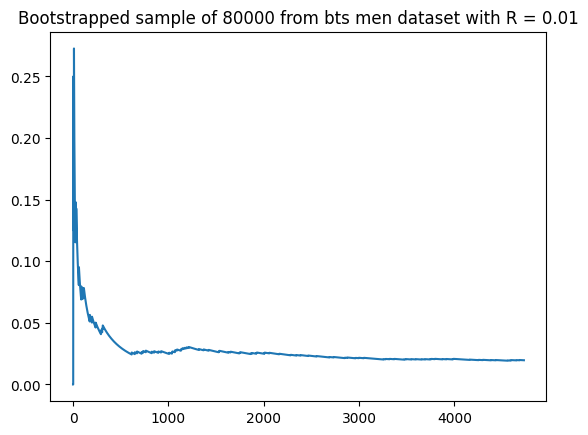

In [25]:
aligned_time_steps, cum_rewards, aligned_ctr, policy = results_4
R = 0.01
print(cum_rewards)
plt.plot(aligned_ctr)
plt.title("Bootstrapped sample of 80000 from bts men dataset with R = "+str(R))
plt.show()

In [28]:
index = max(range(len(gridsearch_results)), key = lambda x : gridsearch_results[x][2][-1])

In [31]:
best_params = np.array(np.meshgrid(param_values, param_values, param_values)).T.reshape(-1, 3)[index]
print(best_params)

[0.01 0.05 0.05]


In [32]:
R, epsilon, delta = best_params

bootstrap_sample_size = 80000

df_main = pd.read_csv('full_random_men.csv')

sample = bootstrap(df_main, 'click', 0.06, 80000)
partial_func = partial(cts.ctr_simulator, K_arms = 34, d = 66, R = R, epsilon = epsilon, delta = delta)
    
best_param_results = partial_func(sample)

80000it [1:23:32, 15.96it/s]


241


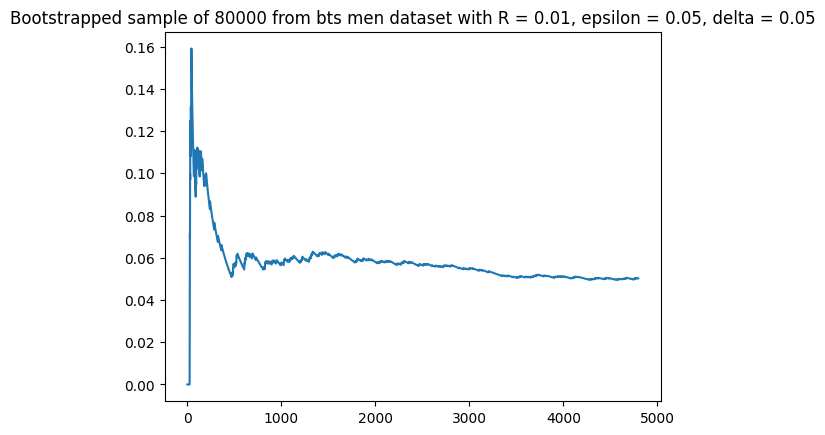

In [33]:
aligned_time_steps, cum_rewards, aligned_ctr, policy = best_param_results
R, epsilon, delta = best_params
print(cum_rewards)
plt.plot(aligned_ctr)
plt.title(f"Bootstrapped sample of 80000 from bts men dataset with R = {R}, epsilon = {epsilon}, delta = {delta}")
plt.show()